In [2]:
from ultralytics import YOLO


In [3]:
# Refer to README.md for information about models used
# This commands DOWNLOADS the model if it is not already cached
model = YOLO("yolov8m.pt") # ~50 MB download


In [4]:
results = model.predict('datasets/mumbai-led-light-traffic-signal-2021-600x338.jpg')
print("results --> ", len(results))
result = results[0]


image 1/1 /home/kanika/workspace/objectDetection/yoloV8/datasets/mumbai-led-light-traffic-signal-2021-600x338.jpg: 384x640 9 cars, 8 traffic lights, 758.5ms
Speed: 6.1ms preprocess, 758.5ms inference, 10.6ms postprocess per image at shape (1, 3, 384, 640)
results -->  1


In [ ]:
len(result.boxes)

17

In [ ]:
# Each box is an element in the list
result.boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2., 2., 2., 2., 2., 9., 9., 9., 9., 2., 9., 9., 2., 9., 2., 9., 2.])
conf: tensor([0.9213, 0.8989, 0.8352, 0.7502, 0.6618, 0.6414, 0.6332, 0.5988, 0.5367, 0.4992, 0.4926, 0.4818, 0.4515, 0.4284, 0.3976, 0.3548, 0.2796])
data: tensor([[3.2333e+01, 2.6034e+02, 1.7509e+02, 3.3608e+02, 9.2131e-01, 2.0000e+00],
        [4.4899e+02, 2.4221e+02, 5.8883e+02, 3.2032e+02, 8.9885e-01, 2.0000e+00],
        [1.5376e+02, 2.5802e+02, 1.9856e+02, 3.2552e+02, 8.3521e-01, 2.0000e+00],
        [5.4920e+02, 2.3111e+02, 5.9979e+02, 2.7275e+02, 7.5015e-01, 2.0000e+00],
        [4.9097e+02, 2.7037e+02, 5.9968e+02, 3.3468e+02, 6.6175e-01, 2.0000e+00],
        [3.6688e+02, 1.6946e+02, 3.8460e+02, 2.0503e+02, 6.4140e-01, 9.0000e+00],
        [1.5713e+01, 3.1833e+01, 3.1028e+01, 7.5640e+01, 6.3322e-01, 9.0000e+00],
        [3.0043e+02, 1.7869e+02, 3.1231e+02, 2.0701e+02, 5.9884e-01, 9.0000e+00],
        [5.0206e+02, 1.5720e+02, 5.1484e+02, 1.

In [ ]:
box_1 = result.boxes[0]
box_1

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2.])
conf: tensor([0.9213])
data: tensor([[ 32.3330, 260.3371, 175.0945, 336.0787,   0.9213,   2.0000]])
id: None
is_track: False
orig_shape: (338, 600)
shape: torch.Size([1, 6])
xywh: tensor([[103.7138, 298.2079, 142.7615,  75.7416]])
xywhn: tensor([[0.1729, 0.8823, 0.2379, 0.2241]])
xyxy: tensor([[ 32.3330, 260.3371, 175.0945, 336.0787]])
xyxyn: tensor([[0.0539, 0.7702, 0.2918, 0.9943]])

In [ ]:
print("Object type:", box_1.cls[0])
print("Coordinates:", box_1.xyxy[0])
print("Probability:", box_1.conf[0])

Object type: tensor(2.)
Coordinates: tensor([ 32.3330, 260.3371, 175.0945, 336.0787])
Probability: tensor(0.9213)


In [ ]:
# To extract data from tensor object to python object
print("Object type:", box_1.cls[0].item())
print("Coordinates:", box_1.xyxy[0].tolist())
print("Probability:", box_1.conf[0].tolist())

Object type: 2.0
Coordinates: [32.3330192565918, 260.33709716796875, 175.094482421875, 336.07867431640625]
Probability: 0.9213142991065979


In [ ]:
print("Object Identified -> ", result.names[box_1.cls[0].item()])
print("Coordinates:", box_1.xyxy[0].tolist())
print("Probability:", round(box_1.conf[0].tolist(), 2))

Object Identified ->  car
Coordinates: [32.3330192565918, 260.33709716796875, 175.094482421875, 336.07867431640625]
Probability: 0.92


In [ ]:
for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")

Object type: car
Coordinates: [32, 260, 175, 336]
Probability: 0.92
---
Object type: car
Coordinates: [449, 242, 589, 320]
Probability: 0.9
---
Object type: car
Coordinates: [154, 258, 199, 326]
Probability: 0.84
---
Object type: car
Coordinates: [549, 231, 600, 273]
Probability: 0.75
---
Object type: car
Coordinates: [491, 270, 600, 335]
Probability: 0.66
---
Object type: traffic light
Coordinates: [367, 169, 385, 205]
Probability: 0.64
---
Object type: traffic light
Coordinates: [16, 32, 31, 76]
Probability: 0.63
---
Object type: traffic light
Coordinates: [300, 179, 312, 207]
Probability: 0.6
---
Object type: traffic light
Coordinates: [502, 157, 515, 187]
Probability: 0.54
---
Object type: car
Coordinates: [509, 228, 544, 241]
Probability: 0.5
---
Object type: traffic light
Coordinates: [169, 160, 184, 192]
Probability: 0.49
---
Object type: traffic light
Coordinates: [103, 169, 116, 190]
Probability: 0.48
---
Object type: car
Coordinates: [121, 237, 169, 267]
Probability: 0.45
---

In [6]:
result.plot()

array([[[105,  90,  88],
        [105,  90,  88],
        [104,  88,  89],
        ...,
        [ 66,  62,  57],
        [ 66,  62,  57],
        [ 66,  62,  57]],

       [[ 70,  55,  53],
        [ 70,  55,  53],
        [ 70,  54,  55],
        ...,
        [ 17,  13,   8],
        [ 17,  13,   8],
        [ 17,  13,   8]],

       [[ 65,  49,  50],
        [ 65,  49,  50],
        [ 65,  49,  50],
        ...,
        [ 26,  22,  17],
        [ 26,  22,  17],
        [ 26,  22,  17]],

       ...,

       [[112, 158, 175],
        [113, 162, 176],
        [118, 164, 181],
        ...,
        [ 31, 112, 255],
        [ 31, 112, 255],
        [ 31, 112, 255]],

       [[123, 164, 179],
        [122, 166, 179],
        [122, 163, 178],
        ...,
        [ 38,  42,  72],
        [ 38,  43,  75],
        [ 38,  32,  49]],

       [[145, 184, 198],
        [144, 183, 197],
        [140, 179, 193],
        ...,
        [101,  82,  79],
        [101,  82,  79],
        [101,  82,  79]]

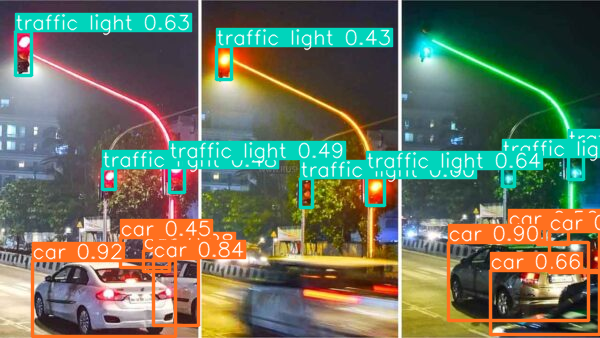

In [5]:
from PIL import Image
Image.fromarray(result.plot()[:,:,::-1])

## Model Training

In [10]:
import os
BASE = os.environ.get("HOME")

In [11]:
model.train(data=f"{BASE}/workspace/objectDetection/yoloV8/datasets/road_sign_data/data.yaml", epochs=30)

Ultralytics YOLOv8.2.35 🚀 Python-3.8.10 torch-2.3.1+cu121 CPU (Intel Core(TM) i5-1035G1 1.00GHz)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/home/kanika/workspace/objectDetection/yoloV8/datasets/road_sign_data/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_con

train: Scanning /home/kanika/workspace/objectDetection/yoloV8/datasets/road_sign_data/train/labels.cache... 1376 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1376/1376 [00:00<?, ?it/s]
val: Scanning /home/kanika/workspace/objectDetection/yoloV8/datasets/road_sign_data/valid/labels.cache... 488 images, 0 backgrounds, 0 corrupt: 100%|██████████| 488/488 [00:00<?, ?it/s]


Plotting labels to runs/detect/train10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0004, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train10
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/86 [00:00<?, ?it/s]

: 